# Pickling Scholars@TAMU Excel Data  
**Filename:** pickle_raw_data.ipynb  
**Path:** TAMIDS/Code/Scholars@TAMU Data/pickling_raw_data.ipynb  
**Created Date:** 19 March 2022, 13:52 

Since the excel docs provided take over 8 minutes to fully be covnerted to Dataframes, they will be converted to .pickle files for quicker access.

In [1]:
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json

pd.options.display.float_format = '{:,.1f}'.format
pd.options.styler.format.precision = 0
pd.options.styler.format.thousands = ','
pd.options.display.max_columns = 50
plt.style.use('seaborn-darkgrid')

# General Markdown Formatting Functions

def printmd(string, level=1):
    header_level = '#'*level + ' '
    display(Markdown(header_level + string))

## Scholars@TAMU

In [2]:
path_to_provided_data = "../../Provided Resources/2022 Student Data Science Competition_TAMIDS/Scholars@TAMU Data"

!ls "$path_to_provided_data"

Scholars API Documentation.docx  grant_award
Scholars InfomationSheet.pdf     organizations
Scholars data dictionary.pdf     people
ScholarsAPI Info.pdf             publications
courses                          sample ris_TAMU at Galveston.ris
data overview.pdf


In [3]:
path_to_pickled_data = "../../Data/Scholars@TAMU"

!ls "$path_to_pickled_data"

courses           organizations     publications
grants_and_awards people


In [4]:
excel_filenames = {
    "people": [
        "people_affiliation",
        "People_education",
        "people_overview",
        "people_subject_areas"
    ],
    "courses": [
        "Course_overview"
    ],
    "grant_award": [
        "Award_overview",
        "Grant_abstract",
        "Grant_overview"
    ],
    "organizations": [
        "organization_external",
        "organization_local"
    ],
    "publications": [
        "Pub_abstract",
        "Pub_author_institutions",
        "Pub_overview",
        "Pub_subject_journal_wos",
        "Pub_unsdg"
    ]
}

pickle_filenames = {
    "people": [
        "people_affiliation",
        "people_education",
        "people_overview",
        "people_subject_areas"
    ],
    "courses": [
        "course_overview"
    ],
    "grants_and_awards": [
        "awards_overview",
        "grants_abstract",
        "grants_overview"
    ],
    "organizations": [
        "organizations_external",
        "organizations_local"
    ],
    "publications": [
        "publications_abstract",
        "publications_author_institutions",
        "publications_overview",
        "publications_subject_journal_wos",
        "publications_unsdg"
    ]
}

with open('dicts/excel_filenames.json', 'w') as outfile:
    json.dump(excel_filenames, outfile, indent=4)

with open('dicts/raw_filenames.json', 'w') as outfile:
    json.dump(pickle_filenames, outfile, indent=4)

In [5]:
import os

def convert_bytes(num):
    for unit in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return f"{num:.1f} {unit}"
        num /= 1024.0


def file_size(file_path, convert=False):
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        if convert:
            return convert_bytes(file_info.st_size)
        else:
            return file_info.st_size


In [58]:
excel_sizes_dict = {folder:{filename: file_size(f"{path_to_provided_data}/{folder}/{filename}.xlsx") for filename in filenames} for folder, filenames in excel_filenames.items()}
pickle_sizes_dict = {folder:{filename: file_size(f"{path_to_pickled_data}/{folder}/raw_{filename}.pickle") for filename in filenames} for folder, filenames in pickle_filenames.items()}

excel_reform = {(folder, filename): size \
    for folder, folder_dict in excel_sizes_dict.items() \
    for filename, size in folder_dict.items()}
pickle_reform = [size \
    for folder, folder_dict in pickle_sizes_dict.items() \
    for filename, size in folder_dict.items()]

size_df = pd.DataFrame(excel_reform, index=['excel_file_size'])
size_df.columns = size_df.columns.sort_values(ascending=[True, False])
size_df.loc['pickle_file_size'] = pickle_reform

total_size_df = size_df.groupby(axis=1, level=0).sum()
combined_total_size_df = pd.DataFrame(total_size_df.sum(axis=1), columns=['combined_total'])

def display_size_with_style(df:pd.DataFrame, color_map):
    converted_df = df.applymap(convert_bytes)

    cm = sns.color_palette(color_map, as_cmap=True)
    color_df = converted_df.style.text_gradient(cmap=cm, axis=None, gmap=df.to_numpy())
    display(color_df)

printmd("size of each file", 3)
display_size_with_style(size_df, "light:fuchsia")
printmd("size of each folder", 3)
display_size_with_style(total_size_df, "light:fuchsia")
printmd("total_size", 3)
display_size_with_style(combined_total_size_df, "light:fuchsia")

### size of each file

### size of each folder

,courses,grant_award,organizations,people,publications
excel_file_size,368.7 KB,2.1 MB,3.9 MB,10.0 MB,140.6 MB
pickle_file_size,892.6 KB,4.8 MB,5.2 MB,34.4 MB,494.7 MB


### total_size

,combined_total
excel_file_size,156.9 MB
pickle_file_size,539.9 MB


In [99]:
cmaps = [
       plt.colormaps["Greys"],
       plt.colormaps["Oranges"],
       plt.colormaps["Greens"],
       plt.colormaps["Blues"],
       plt.colormaps["Purples"]
]

folder_cvals = [np.linspace(0.2,0.8,len(folder)).tolist() for folder in pickle_filenames.values()]
cmap12 = [cm(cval) for cm, cval in zip(cmaps, folder_cvals)]

x = []
for l in [cml.tolist() for cml in cmap12]:
       for a in l:
              x.append(a)

x

[[0.8870588235294118, 0.8870588235294118, 0.8870588235294118, 1.0],
 [0.7105882352941176, 0.7105882352941176, 0.7105882352941176, 1.0],
 [0.47843137254901963, 0.47843137254901963, 0.47843137254901963, 1.0],
 [0.25098039215686274, 0.25098039215686274, 0.25098039215686274, 1.0],
 [0.9937254901960785, 0.8501960784313726, 0.7043137254901961, 1.0],
 [0.8274509803921569, 0.9325490196078431, 0.8031372549019608, 1.0],
 [0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0],
 [0.0823529411764706, 0.49803921568627446, 0.23137254901960783, 1.0],
 [0.8141176470588235, 0.883921568627451, 0.9498039215686275, 1.0],
 [0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0],
 [0.8878431372549019, 0.8847058823529411, 0.9372549019607843, 1.0],
 [0.7617070357554787, 0.7648135332564399, 0.8749711649365629, 1.0],
 [0.617762399077278, 0.6021376393694733, 0.7834525182622069, 1.0],
 [0.48402921953094963, 0.4543329488658208, 0.7106651287966167, 1.0],
 [0.3811764705882353, 0.25176470588235

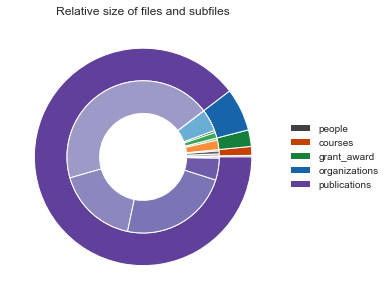

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)

size = 0.3
vals = np.array([60., 32., 40., 50., 20., 37., 40., 29., 10., 20.])
inner_vals = size_df.loc['excel_file_size'].to_numpy()
outer_vals = total_size_df.loc['excel_file_size'].to_numpy()

# inner_vals = vals.flatten()
# outer_vals = np.array([202., 77., 39., 20.])
cmaps = [
       plt.colormaps["Greys"],
       plt.colormaps["Oranges"],
       plt.colormaps["Greens"],
       plt.colormaps["Blues"],
       plt.colormaps["Purples"]
]
folder_cvals = [np.linspace(0.5,0.8,len(folder)).tolist() for folder in pickle_filenames.values()]
cmap12 = [cm(cval) for cm, cval in zip(cmaps, folder_cvals)]

x = []
for l in [cml.tolist() for cml in cmap12]:
       for a in l:
              x.append(a)

x
outer_colors = np.array([cm(0.8) for cm in cmaps])
# inner_colors = [np.linspace(0.2,0.8,len(folder)).tolist() for folder in pickle_filenames.values()]
inner_colors = x

ax.pie(outer_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=excel_filenames.keys(), labeldistance=None)

ax.pie(inner_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Relative size of files and subfiles')
plt.legend(loc='right', bbox_to_anchor=(1.4,0.5))
plt.show()

## ./people

In [59]:
people_path = path_to_provided_data + "/people"

people_raw = {filename: pd.read_excel(people_path + "/" + filename + ".xlsx") for filename in excel_filenames["people"]}

In [111]:
new_people_path = path_to_pickled_data + "/people"

for (excelfile, df), picklefile in zip(people_raw.items(), pickle_filenames['people']):
    filepath = f"{new_people_path}/raw_{picklefile}.pickle"
    df.to_pickle(filepath)

    print(f"people_raw[{excelfile}]\t->\traw_{picklefile}.pickle")

people_raw[people_affiliation]	->	raw_people_affiliation.pickle
people_raw[People_education]	->	raw_people_education.pickle
people_raw[people_overview]	->	raw_people_overview.pickle
people_raw[people_subject_areas]	->	raw_people_subject_areas.pickle


In [115]:
people_pickle = {picklename: pd.read_pickle(new_people_path + "/raw_" + picklename + ".pickle") for picklename in pickle_filenames['people']}

read_excel() time: 15.4s  
read_pickle() time: 0.2s

## ./courses

In [100]:
courses_path = path_to_provided_data + "/courses"

courses_raw = {filename: pd.read_excel(courses_path + "/" + filename + ".xlsx") for filename in excel_filenames["courses"]}

In [117]:
new_courses_path = path_to_pickled_data + "/courses"

for (excelfile, df), picklefile in zip(courses_raw.items(), pickle_filenames['courses']):
    filepath = f"{new_courses_path}/raw_{picklefile}.pickle"
    df.to_pickle(filepath)

    print(f"courses_raw[{excelfile}]\t->\traw_{picklefile}.pickle")

courses_raw[Course_overview]	->	raw_course_overview.pickle


In [116]:
courses_pickle = {picklename: pd.read_pickle(new_courses_path + "/raw_" + picklename + ".pickle") for picklename in pickle_filenames['courses']}

read_excel() time: 65.5s  
read_pickle() time: 0.2s

## ./grant_award

In [9]:
grants_path = path_to_provided_data + "/grant_award"

grants_raw = {filename: pd.read_excel(grants_path + "/" + filename + ".xlsx") for filename in excel_filenames["grant_award"]}

In [10]:
new_grants_path = path_to_pickled_data + "/grants_and_awards"

for (excelfile, df), picklefile in zip(grants_raw.items(), pickle_filenames['grants_and_awards']):
    filepath = f"{new_grants_path}/raw_{picklefile}.pickle"
    df.to_pickle(filepath)

    print(f"grants_raw[{excelfile}]\t->\traw_{picklefile}.pickle")

grants_raw[Award_overview]	->	raw_awards_overview.pickle
grants_raw[Grant_abstract]	->	raw_grants_abstract.pickle
grants_raw[Grant_overview]	->	raw_grants_overview.pickle


In [11]:
grants_pickle = {picklename: pd.read_pickle(new_grants_path + "/raw_" + picklename + ".pickle") for picklename in pickle_filenames['grants_and_awards']}

read_excel() time: 14.5s  
read_pickle() time: 0.7s

## ./organizations

In [122]:
orgs_path = path_to_provided_data + "/organizations"

orgs_raw = {filename: pd.read_excel(orgs_path + "/" + filename + ".xlsx") for filename in excel_filenames["organizations"]}

In [123]:
new_orgs_path = path_to_pickled_data + "/organizations"

for (excelfile, df), picklefile in zip(orgs_raw.items(), pickle_filenames['organizations']):
    filepath = f"{new_orgs_path}/raw_{picklefile}.pickle"
    df.to_pickle(filepath)

    print(f"orgs_raw[{excelfile}]\t->\traw_{picklefile}.pickle")

orgs_raw[organization_external]	->	raw_organizations_external.pickle
orgs_raw[organization_local]	->	raw_organizations_local.pickle


In [125]:
orgs_pickle = {picklename: pd.read_pickle(new_orgs_path + "/raw_" + picklename + ".pickle") for picklename in pickle_filenames['organizations']}

read_excel() time: 117.5s  
read_pickle() time: 0.3s

## ./publications

In [127]:
pubs_path = path_to_provided_data + "/publications"

pubs_raw = {filename: pd.read_excel(pubs_path + "/" + filename + ".xlsx") for filename in excel_filenames["publications"]}

In [128]:
new_pubs_path = path_to_pickled_data + "/publications"

for (excelfile, df), picklefile in zip(pubs_raw.items(), pickle_filenames['publications']):
    filepath = f"{new_pubs_path}/raw_{picklefile}.pickle"
    df.to_pickle(filepath)

    print(f"pubs_raw[{excelfile}]\t->\traw_{picklefile}.pickle")

pubs_raw[Pub_abstract]	->	raw_publications_abstract.pickle
pubs_raw[Pub_author_institutions]	->	raw_publications_author_institutions.pickle
pubs_raw[Pub_overview]	->	raw_publications_overview.pickle
pubs_raw[Pub_subject_journal_wos]	->	raw_publications_subject_journal_wos.pickle
pubs_raw[Pub_unsdg]	->	raw_publications_unsdg.pickle


In [132]:
people_pickle = {picklename: pd.read_pickle(new_people_path + "/raw_" + picklename + ".pickle") for picklename in pickle_filenames['people']}

read_excel() time: 1364.2s  
read_pickle() time: 0.4s